<a href="https://colab.research.google.com/github/esnue/ThesisAllocationSystem/blob/main/4_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualization of CTM output results
In this notebook, we will visualize our CTM output. 

## Import what we need

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.colors as mcolors

## Data
Let's import the dataframe that holds all of the relevant CTM outputs for our corpus of academic papers. 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
topics_df = pd.read_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label.csv')

print(topics_df.sample(5))
print("There are ", len(topics_df.topic_id.unique()), "topics in total.")

                prof  ...                                       distribution
163   Costello15.txt  ...  [0.011759927216917276, 0.007264112963457592, 0...
30    Roemmele12.txt  ...  [0.015685715107247235, 0.16113232597708702, 0....
76      Jankin38.txt  ...  [0.1299343321006745, 0.027759842411614954, 0.0...
440         cis7.txt  ...  [0.025173379393527283, 0.06033282923744991, 0....
761  stockmann18.txt  ...  [0.037176481122151016, 0.13980714147910475, 0....

[5 rows x 4 columns]
There are  14 topics in total.


## Create wide & long format

In [4]:
# Extract list of topic proportions 
list_prop = topics_df.iloc[:,3]

# Convert to float array
ar_float = np.array([[float(i) for i in j[1:-1].split(', ')] for j in list_prop])

# Create col labels 
topics = []
for i in list(range(0, 14)):
     topics.append('Topic' + str(i))

# Add col labels to float array
topiclab_df = pd.DataFrame(data = ar_float, columns=topics)
topiclab_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13
0,0.009234,0.013933,0.027286,0.019762,0.014530,0.023150,0.045658,0.041960,0.089979,0.014097,0.020300,0.638849,0.028969,0.012292
1,0.102841,0.021754,0.066687,0.027214,0.022265,0.042572,0.027066,0.235141,0.099709,0.057614,0.024836,0.199737,0.031868,0.040697
2,0.009742,0.015430,0.034784,0.140046,0.010870,0.057932,0.021482,0.099077,0.014048,0.069009,0.027499,0.009451,0.302332,0.188296
3,0.025711,0.015608,0.040852,0.023090,0.012962,0.031231,0.034215,0.095307,0.070767,0.027278,0.033543,0.532386,0.031209,0.025839
4,0.039954,0.020790,0.046773,0.044506,0.031542,0.049812,0.046903,0.122773,0.123714,0.034530,0.057081,0.322406,0.033792,0.025425


In [5]:
# Change col name 
topics_df.rename(columns={"topic": "topic_words"}, inplace = True)

# Append wide format to topics_df
topics_df_wide = pd.concat([topics_df.iloc[:, 0:3], topiclab_df], axis = 1)

# Reshape to long format
topics_df_long = topics_df_wide.melt(id_vars = ['prof', 'topic_id', 'topic_words'],
                                     var_name = 'topic',
                                     value_name = 'topic_prop')

In [ ]:
print("This is the wide format.\n", topics_df_wide.head(5))
print("This is the long format.\n", topics_df_long.head(5))

This is the wide format.
                 prof  topic_id  ...   Topic12   Topic13
0  Hammerschmid1.txt        11  ...  0.028969  0.012292
1  Hammerschmid2.txt         7  ...  0.031868  0.040697
2  Hammerschmid3.txt        12  ...  0.302332  0.188296
3  Hammerschmid4.txt        11  ...  0.031209  0.025839
4  Hammerschmid5.txt        11  ...  0.033792  0.025425

[5 rows x 17 columns]
This is the long format.
                 prof  topic_id  ...   topic topic_prop
0  Hammerschmid1.txt        11  ...  Topic0   0.009234
1  Hammerschmid2.txt         7  ...  Topic0   0.102841
2  Hammerschmid3.txt        12  ...  Topic0   0.009742
3  Hammerschmid4.txt        11  ...  Topic0   0.025711
4  Hammerschmid5.txt        11  ...  Topic0   0.039954

[5 rows x 5 columns]


In [ ]:
# Save wide and long formats 
#topics_df_wide.to_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label_wide.csv', index = False)
#topics_df_wide.to_csv('/content/drive/MyDrive/ThesisAllocationSystem/data_final/ctm_label/train-label_long.csv', index = False)

## Stacked Bar Chart

In [142]:
def prep_table(data): 
  # Remove number and .txt from prof
  data['prof'] = data['prof'].str.replace('[0-9]', '').str.replace('\.txt', '').str.upper()

  # Isolate prof name + topic values
  data1 = pd.concat([data['prof'], data.iloc[:, 3:31]], axis = 1)

  # Average topic proportions per professor 
  data2 = data1.groupby('prof').mean().reset_index()
  return(data2)


In [146]:
bardat = prep_table(topics_df_wide)

In [129]:
def plot_topic(topicname, data): 
  data1 = data.sort_values(topicname)
  plt.rcParams["figure.figsize"] = [10,6]
  data1.plot(
    x = 'prof',
    kind = 'barh',
    stacked = True,
    title = 'Distribution of Professors in Topics',
    mark_right = True,
    cmap="tab20c")

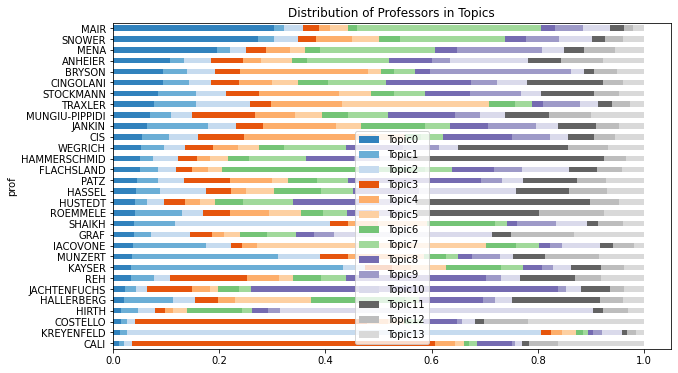

In [147]:
plot_topic('Topic0', bardat)

In [131]:
def plot_prof(profname, data):
  data1 = data[(data.prof == profname)]
  data2 = data1.transpose().iloc[1:].reset_index()
  data2.columns = ['topics', 'values']
  data2 = data2.sort_values(by = ['values'], ascending = False)

  topics = list(data2.iloc[:,0])
  values = list(data2.iloc[:,1])

  y_pos = list(reversed(np.arange(len(topics))))
  plt.rcParams["figure.figsize"] = [10,6]
 
  # Create horizontal bars
  plt.barh(y_pos, values)
 
  # Create names on the x-axis
  plt.yticks(y_pos, topics)
 
  # Show graphic
  plt.show()


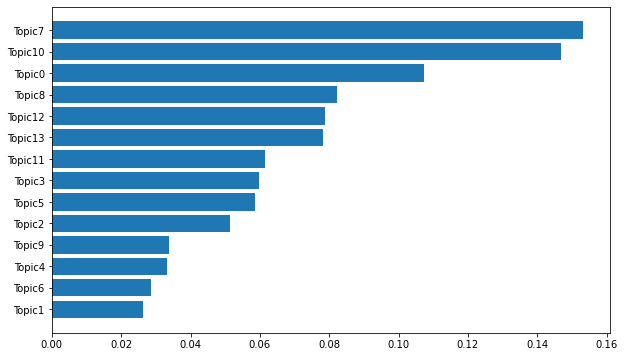

In [148]:
plot_prof("ANHEIER", bardat)

In [ ]:
# Next steps: assign labels to each topic 
# Create field where you can click on each topic and see bar chart above sorted by label of interest 
# Integrate supervision plans 

## Bar Chart: Word Counts of Topic Keywords

In [12]:
topics_df_long.head(5)

,prof,topic_id,topic_words,topic,topic_prop
0,Hammerschmid1.txt,11,"['political', 'public', 'government', 'parties...",Topic0,0.009234
1,Hammerschmid2.txt,7,"['organizations', 'business', 'social', 'entre...",Topic0,0.102841
2,Hammerschmid3.txt,12,"['ngiven', 'always', 'extend', 'codes', 'const...",Topic0,0.009742
3,Hammerschmid4.txt,11,"['political', 'public', 'government', 'parties...",Topic0,0.025711
4,Hammerschmid5.txt,11,"['political', 'public', 'government', 'parties...",Topic0,0.039954


In [13]:
bardat = topics_df_long.iloc[:, 1:3]
bardat.head(5)

,topic_id,topic_words
0,11,"['political', 'public', 'government', 'parties..."
1,7,"['organizations', 'business', 'social', 'entre..."
2,12,"['ngiven', 'always', 'extend', 'codes', 'const..."
3,11,"['political', 'public', 'government', 'parties..."
4,11,"['political', 'public', 'government', 'parties..."


In [14]:
# remove leading white space's & split by delimiter
bardat['topic_words'] = bardat['topic_words'].str.strip()\
    .str.replace(",\s+", ",")\
    .str.split(',')

# apply group by to get count of each word.
bardat2  = bardat.explode(column='topic_words').groupby(["topic_id","topic_words"]).size().reset_index(name='count')

In [15]:
bardat3 = bardat.groupby(['topic_id']).count().reset_index().rename(columns={"topic_words": "count"})
bardat3.head(5)

,topic_id,count
0,0,616
1,1,588
2,2,714
3,3,756
4,4,1134


In [16]:
bardat3

,topic_id,count
0,0,616
1,1,588
2,2,714
3,3,756
4,4,1134
5,5,826
6,6,784
7,7,1078
8,8,1134
9,9,630


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

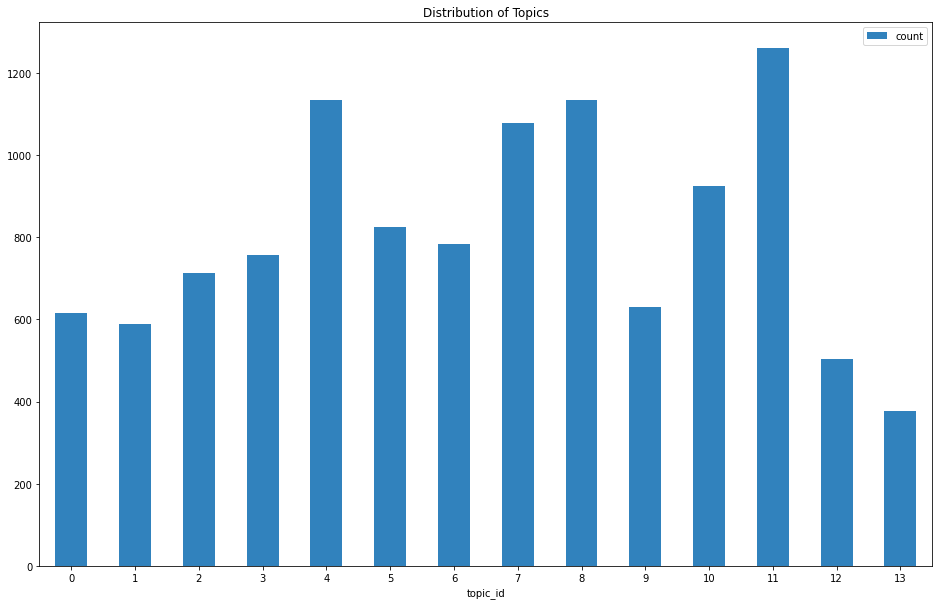

In [17]:
# Plot
plt.rcParams["figure.figsize"] = [16,10]
bardat3.plot(
    x = 'topic_id',
    kind = "bar",
    stacked = False,
    title = 'Distribution of Topics',
    mark_right = True,
    cmap = "tab20c")
plt.xticks(rotation=0)

# Visualize Loss

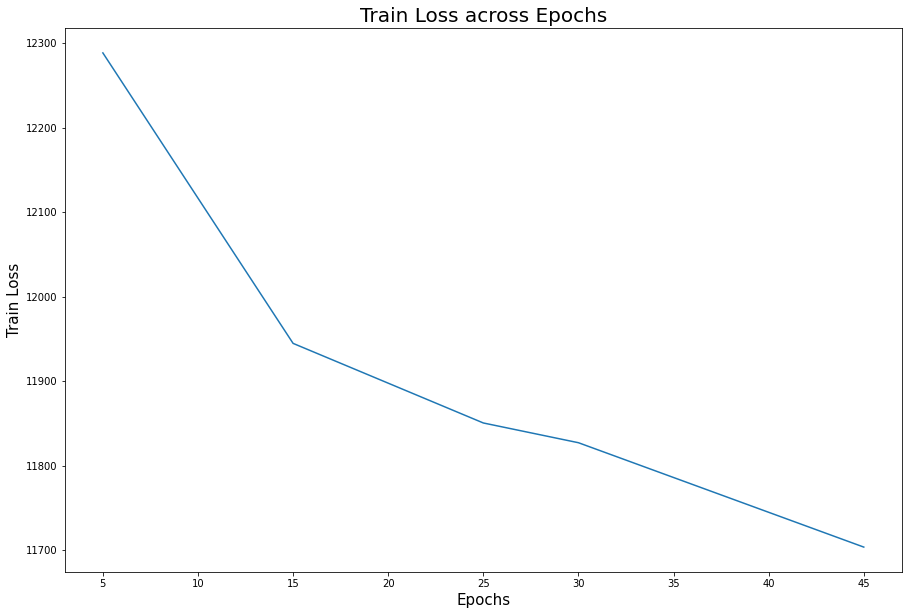

In [18]:
epochs = [5, 15, 25, 30, 45]

loss = [12288.245, 11944.792, 11850.689, 11827.34, 11703.930]

x_unit_length = 5
y_unit_length = 5000

plt.rcParams["figure.figsize"] = [15, 10]
plt.title("Train Loss across Epochs", fontsize=20)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Train Loss", fontsize=15)
plt.plot(epochs, loss)
plt.show()


# Visualize Performance Metrics

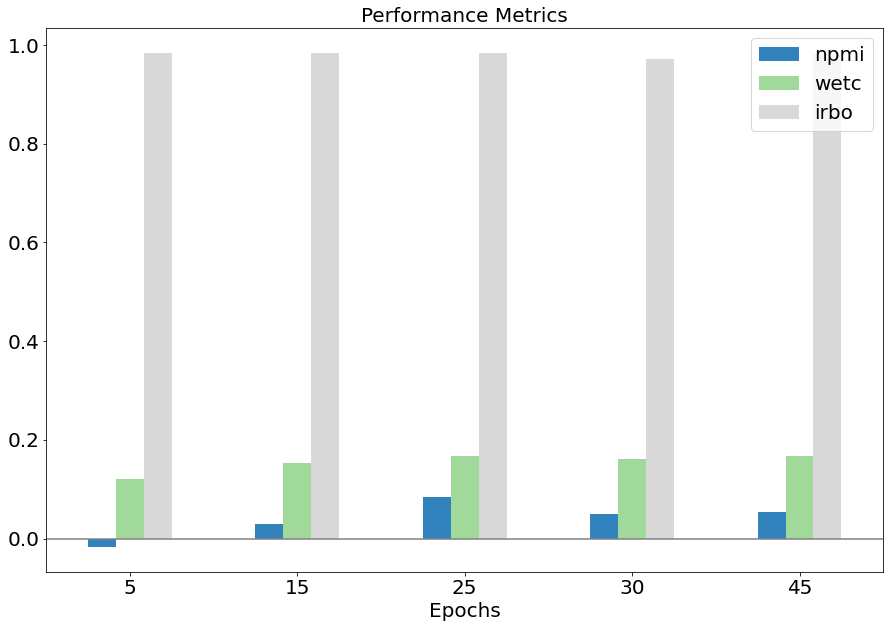

In [19]:
y = pd.DataFrame()
y['npmi']=[-0.017, 0.030, 0.085, 0.050, 0.055]
y['wetc']=[0.120, 0.153, 0.168, 0.162, 0.167]
y['irbo']=[0.983, 0.984, 0.983, 0.971, 0.982]
y['epochs'] = [5, 15, 25, 30, 45]

plt.rcParams["figure.figsize"] = [15, 10]
y.plot(
    x = 'epochs',
    kind = "bar",
    cmap = "tab20c")
plt.axhline(y=0, color='gray', linestyle='-')
plt.xticks(rotation = 0, fontsize = 20)
plt.yticks(rotation = 0, fontsize = 20)
plt.xlabel("Epochs", fontsize = 20)
plt.title("Performance Metrics", fontsize = 20)
plt.legend(prop={'size': 20})